# **1.   Creating a Google Colaboratory File**

---

Not: Proje çalıştırmadan önce githubda ekli bulunan insurance.csv dosyasını colab ortamına eklemeyi unutmayınız.



# **2.   Importing Required Libraries**

---
Import the required libraries for the project to the Colab environment.

---
Proje için gerekli kitaplıkları Colab ortamına aktarın.



In [ ]:
# Kütüphanelerin eklenmesi
# 3. Kısım işlemleri
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
# 4. Kısım işlemleri
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
# 5. Kısım işlemleri
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, ElasticNet, BayesianRidge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
# 6. Kısım işlemleri
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  make_scorer, mean_squared_error

# 7. Kısım işlemleri
from sklearn.metrics import r2_score, mean_absolute_error


# **3.   Perform An Exploratory Data Analysis**

---
Analyze the data and draw meaningful conclusions from the data.

---
Verileri analiz edin ve verilerden anlamlı sonuçlar çıkarın.



In [ ]:
df = pd.read_csv("insurance.csv", encoding = "UTF-8")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

Bu datamız da 6 özellik ve 1 kategori kolonu olmak üzere 7 kolonumuz, 1338 satır verimiz bulunuyor.

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Kolon isimlerimizi görmüş olduk.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Null verimiz bulunmuyor.
Verimiz üzerinde bazı özelliklerin tipi object olarak gözüküyor.

Examine the distribution of Bmi (Body Mass Index)

---
Bmi (Vücut Kitle İndeksi) dağılımını inceleyin

Text(0.5, 1.0, 'BMI Dağılımı')

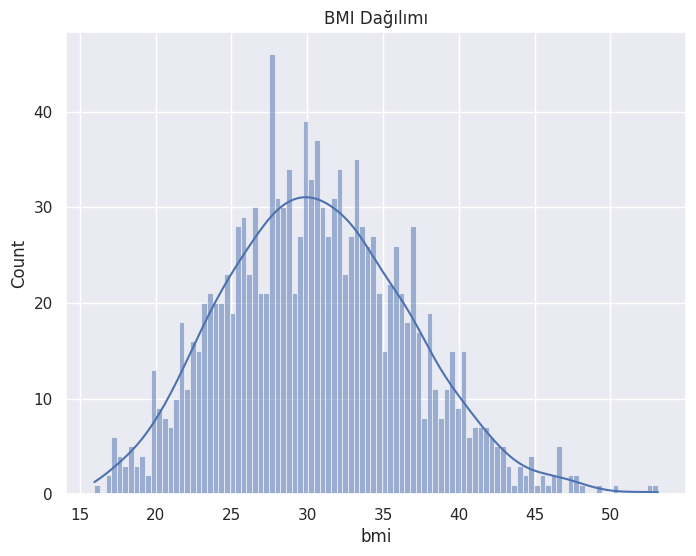

In [ ]:
sns.set(rc={'figure.figsize':(8,6)})

sns.histplot(df["bmi"], bins=100, kde=True)
plt.title("BMI Dağılımı")
# bins ile kolon genişliği değiştiği için daha detaylı gözükebilir. KDE çizgisi ile birlikte normal dağılıma yakın olduğu gözükmektedir.

Examine the relationship between “smoker” and “charges”

---
“Sigara içen” ile “ürcetler” arasındaki ilişkiyi inceleyin


Text(0.5, 1.0, 'Somker(Sigara içen) ile Charges(Ücretler) ilişkisi')

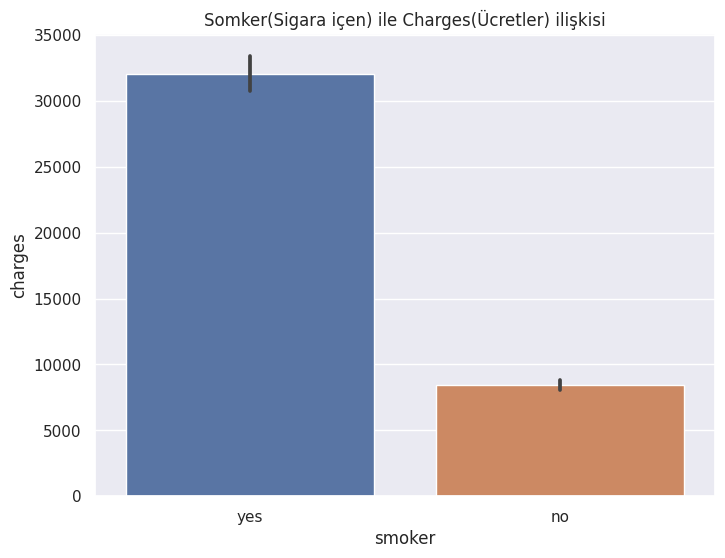

In [ ]:
sns.barplot(x="smoker", y="charges", data=df)
plt.title("Somker(Sigara içen) ile Charges(Ücretler) ilişkisi")
# Altaki grefiğe bakıldığında sigara içenler için ücret miktarı yükselmektedir.

Examine the relationship between “smoker” and “region”

---
“Sigara içen” ile “bölge” arasındaki ilişkiyi inceleyin.


Text(0.5, 1.0, 'Region(Bölge) göre Smoker(Sigara içen) durumları')

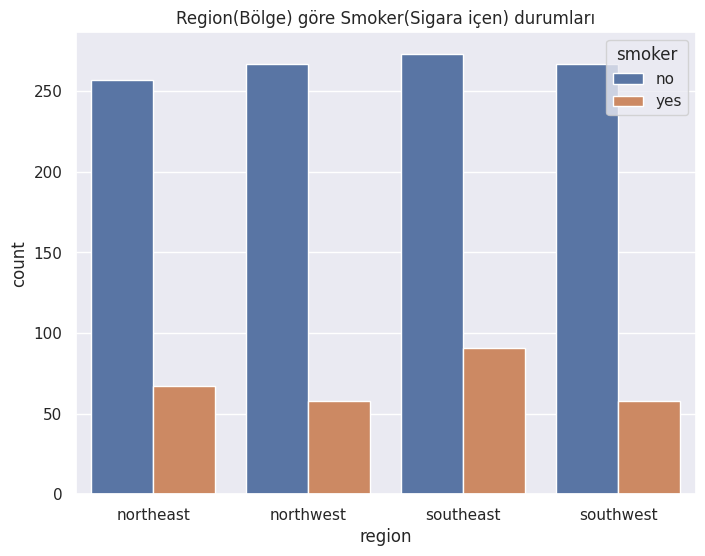

In [ ]:
df_add_count = df.groupby(["region", "smoker"]).size().reset_index(name="count")
sns.barplot(x="region", y="count", hue="smoker",  data=df_add_count)
plt.title("Region(Bölge) göre Smoker(Sigara içen) durumları")
# Bölgelere göre sigara içenlerin durumu gösterilmektedir.

Examine the relationship between “bmi” and “sex”

---

“BMI” ile “cinsiyet” arasındaki ilişkiyi inceleyin.

Text(0.5, 1.0, 'Sex(Cinsiyet) göre BMI dağılımları')

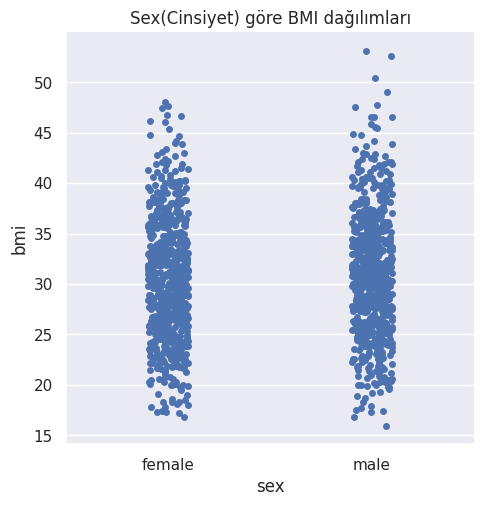

In [ ]:
sns.catplot(x="sex", y= "bmi", data=df)
plt.title("Sex(Cinsiyet) göre BMI dağılımları")

Find the "region" with the most "children"

---
En çok "çocuk"un bulunduğu "bölgeyi" bulun.


In [ ]:
df_add_count = df.groupby("region")["children"].sum()
print(f"Bölgelere göre çocuk sayısı: {df_add_count}.")

print(f"En çok çocuk sayısına sahip Bölge: {df_add_count.idxmax()} ve Çocuk Sayısı:{df_add_count.max()}")

Bölgelere göre çocuk sayısı: region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64.
En çok çocuk sayısına sahip Bölge: southeast ve Çocuk Sayısı:382


Examine the relationship between “age” and “bmi”

---

“Yaş” ile “BMI” arasındaki ilişkiyi inceleyin.

Text(0.5, 1.0, 'Age(Yaş) göre BMI dağılımları')

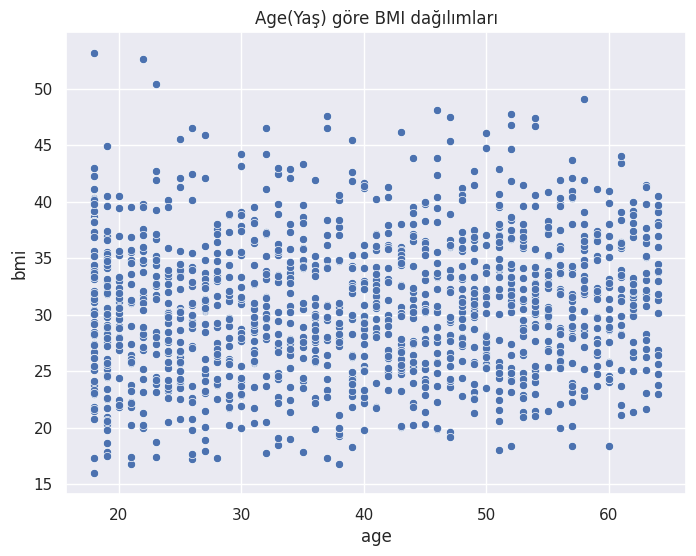

In [ ]:
sns.scatterplot(data=df, x='age', y='bmi')
plt.title("Age(Yaş) göre BMI dağılımları")

Examine the relationship between “bmi” and “children”

---
“BMI” ile “çocuklar” arasındaki ilişkiyi inceleyin.


Text(0.5, 1.0, 'Children(Çocuk Sayısı) göre BMI dağılımları')

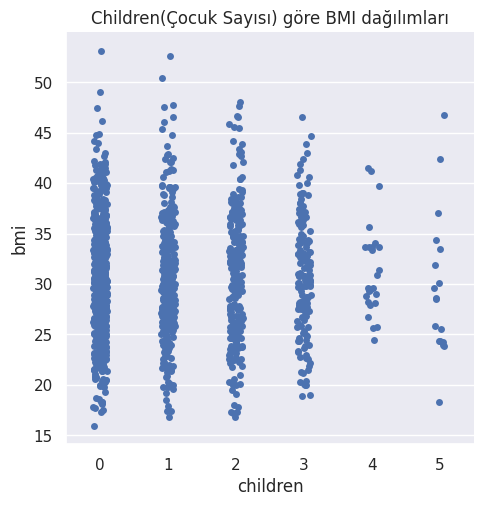

In [ ]:
sns.catplot(x="children", y="bmi", data=df)
plt.title("Children(Çocuk Sayısı) göre BMI dağılımları")

Is there an outlier in the "bmi" variable? Please review

---

"BMI" değişkeninde aykırı değer var mı? Gözden geçirin.

Text(0.5, 1.0, 'BMI boxplot dağılımı')

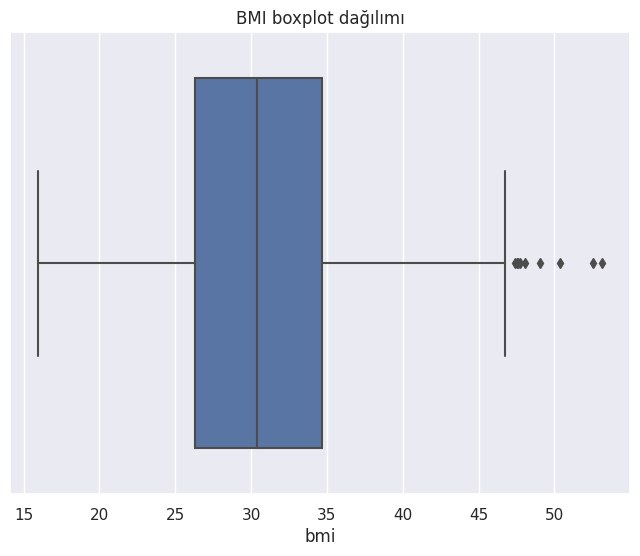

In [ ]:
sns.boxplot(x=df["bmi"])
plt.title("BMI boxplot dağılımı")

Text(0.5, 1.0, 'BMI boxplot dağılımı')

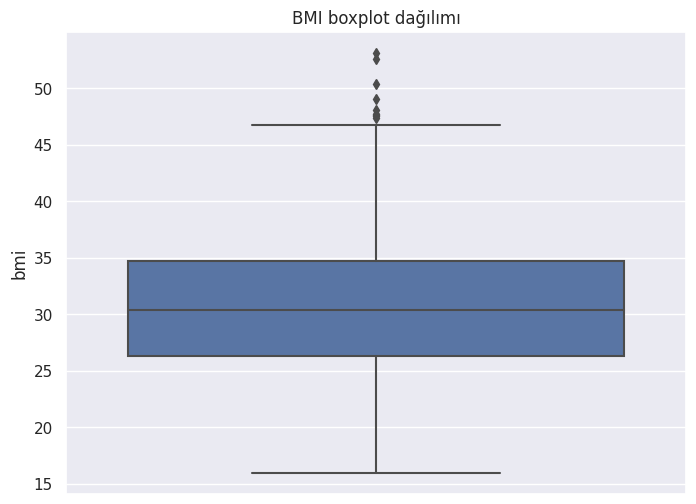

In [ ]:
sns.boxplot(y=df["bmi"])
plt.title("BMI boxplot dağılımı")

Gelen yapıda boxplot ile incelenerek veri bir kalıba sokulması sağlanır. Bu kalıba uymayanlar ayrık veri olarak görülebilir. Üsteki görselleştirmede nokta olarak belirtilenler outlier(Ayrık) veridir.

Examine the relationship between “bmi” and “charges”

---
“BMI” ile “ücretler” arasındaki ilişkiyi inceleyin.


Text(0.5, 1.0, 'BMI göre Charges(Ücretler) dağılımları')

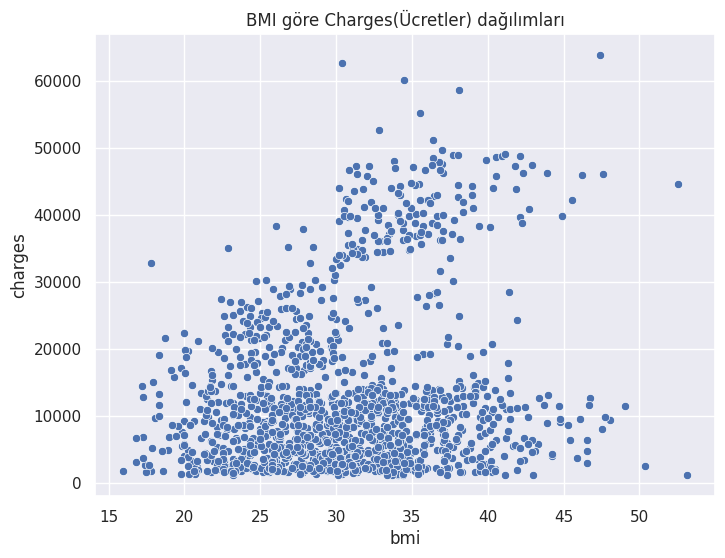

In [ ]:
sns.scatterplot(data=df, x='bmi', y='charges')
plt.title("BMI göre Charges(Ücretler) dağılımları")

Examine the relationship between “region”, “smoker” and “bmi” using bar plot

---
Çubuk grafiğini kullanarak "bölge", "sigara içen" ve "bmi" arasındaki ilişkiyi inceleyin


Text(0.5, 1.0, 'Region(Bölge), BMI ve Smoker(Sigara içenler) ilişkisi')

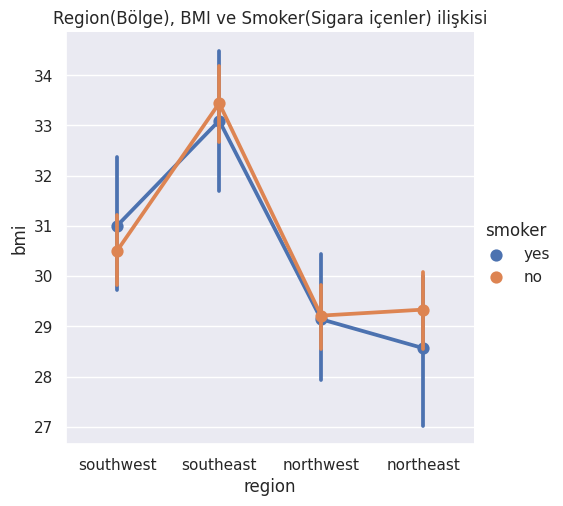

In [ ]:
sns.catplot(x="region", y="bmi", hue="smoker", kind="point", data=df)
plt.title("Region(Bölge), BMI ve Smoker(Sigara içenler) ilişkisi")

# **4.   Data Preprocessing**

---
In this section, prepare the data you have, for training the model. Use Label Encoding and One-Hot Encoding techniques to deal with categorical
variables. Scale the dataset by normalizing it(Min-Max Scaling or Standard Scaling).

---

Bu bölümde modeli eğitmek için sahip olduğunuz verileri hazırlayın. Kategorik değişkenlerle başa çıkmak için Etiket Kodlama ve Tek Sıcak Kodlama tekniklerini kullanın. Veri kümesini normalleştirerek ölçeklendirin (Min-Maks Ölçekleme veya Standart Ölçeklendirme).



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
object_columns= df.select_dtypes("object").columns
object_columns

Index(['sex', 'smoker', 'region'], dtype='object')

3 Kolon için object tipinde tanımlıdır. Bu kolonların özellikleri incelendikten sonra düzenlenmesi gerekir.

In [ ]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
df["smoker"].value_counts()


no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
# Object olan 3 kolon kategorik veri olduğu görüldüğü için bu kolonlar düzenlenmesi yapılır.
# Ana veri bozulmaması için veri seti kopyalanır.
data = df.copy()
for column in object_columns:
  data[column] = data[column].astype("category")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


Önceden incelediğimiz "sex" kolonu için "male,female" değerleri kullanılmış, "smoker" kolonu için "yes,no" değerleri kullanılmış bu iki kategorik iki kolonu Label Encoding tekniği kullanabiliriz. Ama "region" kolonu "southeast, southwest, northwest, northeast" değerlerini kullandığı için Label Encoding tekniği kullanamayız bunun yerine One-Hot Encoding tekniğini kullanmamız gerekir.

In [ ]:
# Label encoding ile kategori verilerini sayısal verilere dönüştürüldü.
label_encoder = LabelEncoder()
data['sex']= label_encoder.fit_transform(data['sex'])
data['smoker']= label_encoder.fit_transform(data['smoker'])
data['region']= label_encoder.fit_transform(data['region'])

# region kolonu çok değere sahip olduğu ve değerlerin birbirine üstünlük kurmaması için One-Hot Encoding uygulanır.
data_onehot = data.copy()
data_onehot = pd.get_dummies(data_onehot, columns=["region"])

data_process = data_onehot.drop("charges", axis=1)
data_process.head()

,age,sex,bmi,children,smoker,region_0,region_1,region_2,region_3
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0


In [ ]:
data_onehot.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801
region_0,1338.0,0.242152,0.428546,0.0000,0.00000,0.000,0.000000,1.00000
region_1,1338.0,0.242900,0.428995,0.0000,0.00000,0.000,0.000000,1.00000
region_2,1338.0,0.272048,0.445181,0.0000,0.00000,0.000,1.000000,1.00000
region_3,1338.0,0.242900,0.428995,0.0000,0.00000,0.000,0.000000,1.00000


<Axes: title={'center': 'Correlation Matrix'}>

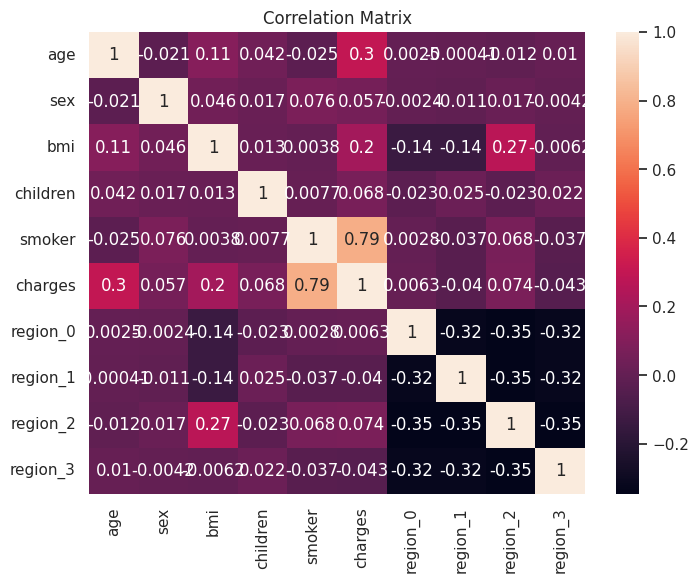

In [ ]:
plt.title('Correlation Matrix')
sns.heatmap(data_onehot.corr(), annot=True)

In [ ]:
# son hale getirdiğimiz veri setinin bazı özelliklerin baskın olmaması için normalleştirme uygulanır.
standart_scaler = StandardScaler()

data_end = standart_scaler.fit_transform(data_process)

dataset = DataFrame(data_end, columns = data_process.columns)

dataset.head()

,age,sex,bmi,children,smoker,region_0,region_1,region_2,region_3
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,-0.565267,-0.566418,-0.611324,1.765481
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,-0.565267,-0.566418,1.635795,-0.566418
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,-0.565267,-0.566418,1.635795,-0.566418
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.565267,1.765481,-0.611324,-0.566418
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.565267,1.765481,-0.611324,-0.566418


In [ ]:
trans = MinMaxScaler()
data_end2 = trans.fit_transform(data_process)

dataset2 = DataFrame(data_end2, columns = data_process.columns)

dataset2.head()

,age,sex,bmi,children,smoker,region_0,region_1,region_2,region_3
0,0.021739,0.0,0.321227,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,1.0,0.479150,0.2,0.0,0.0,0.0,1.0,0.0
2,0.217391,1.0,0.458434,0.6,0.0,0.0,0.0,1.0,0.0
3,0.326087,1.0,0.181464,0.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,1.0,0.347592,0.0,0.0,0.0,1.0,0.0,0.0


İki normalizasyon işleminden min max metriği daha düzgün yaptığını düşündüğüm için veri seti için min-max metriğini uygulayacağım.

In [ ]:
Y = data_onehot["charges"]
X = dataset2

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

Veri seti %20 test %80 train verisi olacak şekilde paylaştırıldı.

# **5.   Model Selection**

---
Select several regression models and train them with the preprocessed data. Examine the performances of the selected models using cross validation

---
Birkaç regresyon modeli seçin ve bunları önceden işlenmiş verilerle eğitin. Çapraz doğrulamayı kullanarak seçilen modellerin performanslarını inceleyin





In [ ]:
# 5 Farklı regresyon modelinin eğitilmesi
model_LinearR = LinearRegression()
model_LinearR.fit(X_train, Y_train)
y_pred_LinearR = model_LinearR.predict(X_test)

steps = [
    ('model', Ridge())
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, Y_train)
y_pred_pipe = ridge_pipe.predict(X_test)

model_ElasticNet = ElasticNet()
model_ElasticNet.fit(X_train, Y_train)
y_pred_ElasticNet = model_ElasticNet.predict(X_test)

model_BayesianRidge = BayesianRidge()
model_BayesianRidge.fit(X_train, Y_train)
y_pred_BayesianRidge = model_BayesianRidge.predict(X_test)

model_SGDR = SGDRegressor()
model_SGDR.fit(X_train, Y_train)
y_pred_SGDR = model_SGDR.predict(X_test)

In [ ]:
# Cross Validation Uygulanır. 5 katlı ve r2 skoru değerlendirilir.
result_LinearR = cross_val_score(model_LinearR, X, Y, cv=5, scoring='r2')

# Sonuçları belirtilir.
print("Cross-Validation Score:", result_LinearR)
print("R^2 Score:", result_LinearR.mean())

Cross-Validation Score: [0.76108459 0.70609754 0.7780649  0.73272858 0.75543119]
R^2 Score: 0.7466813595972301


In [ ]:
# Cross Validation Uygulanır. 5 katlı ve r2 skoru değerlendirilir.
result_Ridge = cross_val_score(ridge_pipe, X, Y, cv=5, scoring='r2')

# Sonuçları belirtilir.
print("Cross-Validation Score:", result_Ridge)
print("R^2 Score:", result_Ridge.mean())

Cross-Validation Score: [0.76122991 0.7077896  0.77700557 0.73297227 0.75535127]
R^2 Score: 0.7468697247720748


In [ ]:
# Cross Validation Uygulanır. 5 katlı ve r2 skoru değerlendirilir.
result_ElasticNet = cross_val_score(model_ElasticNet, X, Y, cv=5, scoring='r2')

# Sonuçları belirtilir.
print("Cross-Validation Score:", result_ElasticNet)
print("R^2 Score:", result_ElasticNet.mean())

Cross-Validation Score: [0.30268866 0.30309994 0.29093665 0.30104274 0.29896778]
R^2 Score: 0.299347153761099


In [ ]:
# Cross Validation Uygulanır. 5 katlı ve r2 skoru değerlendirilir.
result_BayesianRidge = cross_val_score(model_BayesianRidge, X, Y, cv=5, scoring='r2')

# Sonuçları belirtilir.
print("Cross-Validation Score:", result_BayesianRidge)
print("R^2 Score:", result_BayesianRidge.mean())

Cross-Validation Score: [0.76140712 0.70693237 0.77769147 0.73280046 0.75551263]
R^2 Score: 0.7468688104456132


In [ ]:
# Cross Validation Uygulanır. 5 katlı ve r2 skoru değerlendirilir.
result_SGDR = cross_val_score(model_SGDR, X, Y, cv=5, scoring='r2')

# Sonuçları belirtilir.
print("Cross-Validation Score:", result_SGDR)
print("R^2 Score:", result_SGDR.mean())

Cross-Validation Score: [0.76051488 0.70845433 0.77672948 0.73202547 0.7547934 ]
R^2 Score: 0.7465035126687595


R^2 Score değerine bakıldığı zaman Ridge metodu az farkla daha başarılı gözükmektedir. Bu sebeple belirtiğldiği gibi bu yöntem için Hyper-parameter optimizasyonu uygulanacaktır.

# **6.   Hyper-parameter Optimization**

---

Optimize the hyper-parameters of the model selected in the previous step

---
Önceki adımda seçilen modelin hiper parametrelerini optimize edin



In [ ]:
parameters = [ {'model__alpha': np.arange(0, 0.2, 0.01) } ]

scoring_func = make_scorer(mean_squared_error)
model_grid_search = GridSearchCV(estimator = ridge_pipe,
                           param_grid = parameters,
                           scoring = scoring_func,
                           cv = 10,
                           n_jobs = -1)
model_grid_search.fit(X_train, Y_train)

y_pred_grid_search = model_grid_search.predict(X_test)

print(model_grid_search.best_params_)
print(model_grid_search.best_score_)

{'model__alpha': 0.19}
36422900.734945334


# **7.   Model Evaluation**

---
Evaluate the optimized model using regression model evaluation metrics

---
Regresyon modeli değerlendirme ölçümlerini kullanarak optimize edilmiş modeli değerlendirin


In [ ]:
r2_Ridge = r2_score(Y_test, y_pred_pipe)
mae_Ridge = mean_absolute_error(Y_test, y_pred_pipe)
mse_Ridge = mean_squared_error(Y_test, y_pred_pipe)

print("Ridge R² Score:", r2_Ridge)
print("Ridge Mean Absolute Error:", mae_Ridge)
print("Ridge Mean Squared Error:", mse_Ridge)

Ridge R² Score: 0.7241552434312577
Ridge Mean Absolute Error: 4447.221080837099
Ridge Mean Squared Error: 39934717.07438322


In [180]:
r2_Ridge_GridSearch = r2_score(Y_test, y_pred_grid_search)
mae_Ridge_GridSearch = mean_absolute_error(Y_test, y_pred_grid_search)
mse_Ridge_GridSearch = mean_squared_error(Y_test, y_pred_grid_search)

print("Ridge Optimized R² Score:", r2_Ridge_GridSearch )
print("Ridge Optimized Mean Absolute Error:", mae_Ridge_GridSearch )
print("Ridge Optimized Mean Squared Error:", mse_Ridge_GridSearch )

Ridge Optimized R² Score: 0.723937905449528
Ridge Optimized Mean Absolute Error: 4447.874685195223
Ridge Optimized Mean Squared Error: 39966181.623203576


Hyper parameter optimizasyonu yapıldıktan sonra hata metrikleri ile karşılaştırma yapıldığında default modelden daha iyi sonuçlar elde edildiği görülür.